# Getting Started with Open3D

Install open3d

In [ ]:
!pip install open3d

## Reference Materials
[Importing/Exporting Meshes](http://www.open3d.org/docs/release/tutorial/geometry/rgbd_image.html#RGBD-images)

TODO: Include Section on [Sampling Points](http://www.open3d.org/docs/release/tutorial/geometry/mesh.html#Sampling) to do better inference.

TODO: Integrate Open3d section on [RGBD Images](http://www.open3d.org/docs/release/tutorial/geometry/rgbd_image.html#RGBD-images) to read depth from illusions?

# Creating and drawing basic geometry primitives

In [ ]:
!python3 --version

Python 3.8.15


In [ ]:
import open3d as o3d
import open3d.visualization as viz
import numpy as np

# define geometry primitives
sphere_1 = o3d.geometry.TriangleMesh.create_sphere(radius=2.0, resolution = 20)
box_1 = o3d.geometry.TriangleMesh.create_box(width = 4.0)
axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size = 3.0, origin = [0, 2, 0])

print(f"box_1 center pre-translate: {box_1.get_center()}")
# translate box
box_1.translate([1, 1, 0])
# rotate box
R = box_1.get_rotation_matrix_from_xyz([np.pi/4, np.pi/2, 0])
box_1.rotate(R)
# scale box
box_1.scale(.89, center = box_1.get_center())
print(f"box_1 center post-translate: {box_1.get_center()}")
print(axis.has_vertex_colors())

# paint objects
sphere_1.paint_uniform_color([0.1, 0.1, 0.7])

viz.draw_plotly([sphere_1, box_1, axis], lookat=[0,0,0], mesh_show_wireframe = False) # lookat parameter determines where camera looks

box_1 center pre-translate: [2.  0.5 0.5]
box_1 center post-translate: [3.  1.5 0.5]
True


Drawing Using [web visualization](https://github.com/isl-org/Open3D/blob/master/docs/jupyter/visualization/jupyter_visualization.ipynb) doesn't seem to work, immediately crashes session.

# Rendering Scenes ([more examples](http://www.open3d.org/docs/release/python_example/visualization/index.html#render-to-image-py) from Open3D):

[Another Example using an actual model](https://user-images.githubusercontent.com/3722407/195917407-67dcdeaf-6dda-4eb9-aa17-2acced097d83.png)

In [ ]:
import os
os.environ['OPEN3D_CPU_RENDERING'] = 'true'

import open3d as o3d
import open3d.visualization.rendering as rendering
from matplotlib import pyplot as plt

In [ ]:
render = rendering.OffscreenRenderer(1280, 720) # 720p image

okay so an offscreenrenderer is like an instance of a larger "scene" class so you can access and modify scene class attributes by doing `offscreenrenderer.scene`. Kinda confusing but documentation for OffscreenRenderer is [here](http://www.open3d.org/docs/release/python_api/open3d.visualization.rendering.OffscreenRenderer.html#open3d-visualization-rendering-offscreenrenderer) and documentation for scene is [here](http://www.open3d.org/docs/release/python_api/open3d.visualization.rendering.Scene.html#open3d-visualization-rendering-scene). Documentation for Open3DScene is [here](http://www.open3d.org/docs/release/python_api/open3d.visualization.rendering.Open3DScene.html) (think of it like a middle man between scene and OffScreenRenderer).

In [ ]:
sphere_mesh = o3d.geometry.TriangleMesh.create_sphere(create_uv_map=True)
sphere_mesh.compute_vertex_normals(normalized=True) # compute normals for rendering

render.scene.clear_geometry() #clear geometry

#materials
base_material = rendering.MaterialRecord()
base_material.shader = 'defaultLit' # makes the material responsive to light, "defaultUnlit" is the standard value, which makes shader non-responsive to light.
base_material.base_color = [.8, .8, 0, 1] # 32-Bit (R,G,B,A)

#add geometry to scene
render.scene.add_geometry("sphere", sphere_mesh, base_material) #adds geometry (i.e. from a primitive object)
# render.scene.add_model(sphere_mesh) # adds a mesh (imported object)

# scene settings

render.scene.set_lighting(rendering.Open3DScene.LightingProfile.MED_SHADOWS, (0.577, -0.577, -0.577))
"""
If you don't use 'set_lighting' presets, you can manually set the sun direction and intensity like so:
render.scene.scene.set_sun_light([0.707, 0.0, -.707],[1, 1, 1], 75000) #(direction, color, intensity)
render.scene.scene.enable_sun_light(True)
"""
render.scene.show_skybox(True)
render.scene.show_axes(True)
render.scene.show_ground_plane(True, rendering.Scene.GroundPlane.XZ) # create XZ ground plane


render.setup_camera(60.0, [0,.2,0], [2,.75,1.75], [0,1,0]) # sets up camera in (vertical_FOV, center, eye, up) format

# manipulating scene.view object

render.scene.view.set_ambient_occlusion(True)

What do `center`, `eye`, and `up` mean when creating a camera? Info at this stackoverflow post [here](https://stackoverflow.com/questions/21830340/understanding-glmlookat) and some documentation for the OpenGL stuff is [here](https://registry.khronos.org/OpenGL-Refpages/gl2.1/xhtml/gluLookAt.xml) but essentially:


*   Center: Where the Camera looks at in 3d-space (x,y,z)
*   Eye: Where the Camera is positioned in 3d-space (x,y,z)
*   Up: what vector is "up" in your world. You'll probably wanna leave this at [0,1,0] (i.e. a "y-up") world but you can do some funny camera rotations by changing it ([0,0,1] to create a "z-up" world and so on).



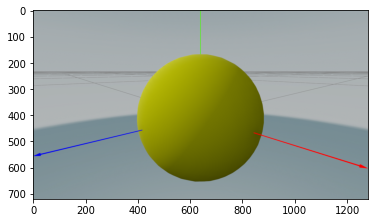

In [ ]:
img = render.render_to_image()
plt.imshow(img)

## Experimenting with material properties

What can we change in materials? How do they affect our image?

In [ ]:
def print_material_attributes(material):
  for elt in dir(material):
    if elt[0] == '_': # no dunder attributes
      continue
    print(f"{elt} = {eval(f'material.{elt}')}")

In [ ]:
print_material_attributes(base_material)

absorption_color = [1. 1. 1.]
absorption_distance = 1.0
albedo_img = None
anisotropy_img = None
ao_img = None
ao_rough_metal_img = None
aspect_ratio = 0.0
base_anisotropy = 0.0
base_clearcoat = 0.0
base_clearcoat_roughness = 0.0
base_color = [0.8 0.8 0.  1. ]
base_metallic = 0.0
base_reflectance = 0.5
base_roughness = 1.0
clearcoat_img = None
clearcoat_roughness_img = None
emissive_color = [0. 0. 0. 1.]
generic_imgs = {}
generic_params = {}
gradient = None
ground_plane_axis = 0.0
has_alpha = False
line_width = 1.0
metallic_img = None
normal_img = None
point_size = 3.0
reflectance_img = None
roughness_img = None
sRGB_color = False
scalar_max = 1.0
scalar_min = 0.0
shader = defaultLit
thickness = 1.0
transmission = 1.0


Materials have a LOT of atributes. The main important ones are ```base_color```, ```base_roughness``` (lower the shinier), ```base_metallic``` (0 or 1 usually for realism, controls...metalness?), and ```shader``` (can be ```defaultUnlit, defaultLit, unlitLine```, etc.)



In [ ]:
def convert_to_float(color, norm = 255):
  """
  Takes an 8-bit color and converts it to a float for 32-bit color needs.
  """
  return (np.array(color)/norm).astype('float32')

def convert_from_float(color, norm = 255):
  """
  Takes a 32-bit color and converts it to a float for 8-bit color needs.
  """
  return (np.array(color) * norm).astype('int8')

In [ ]:
convert_from_float(convert_to_float([2,1,3]))

array([2, 1, 3], dtype=int8)

### Rendering with an Additional Light

In [ ]:
# add lights
render.scene.scene.remove_light("point")
render.scene.scene.add_point_light("point", [255,255,255], [1, 1, 0], 50000, 40, True) # add_point_light(name, color, position, intensity, falloff, cast_shadows)

True

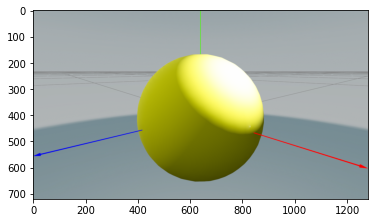

In [ ]:
img = render.render_to_image()
plt.imshow(img)

### Changing Material Properties

In [ ]:
from PIL import ImageColor
mat_1 = rendering.MaterialRecord()
mat_1.base_color = convert_to_float(ImageColor.getcolor("#647fab", mode = "RGBA")) #using pillow to convert hex to 8-bit RGB
mat_1.shader = 'defaultLit'
mat_1.base_roughness = .4 # changing roughness to get a "shinier" ball
mat_1.base_metallic = 1.0 # making the ball metal

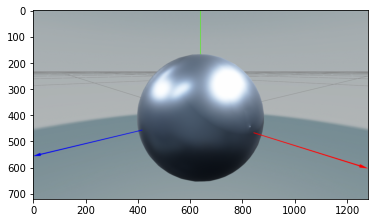

In [ ]:
render.scene.update_material(mat_1) # updates ALL materials
img = render.render_to_image()
plt.imshow(img)

Note the other parts of the scene showing up on the ball. We can get rid of this by turning off indirect lighting.

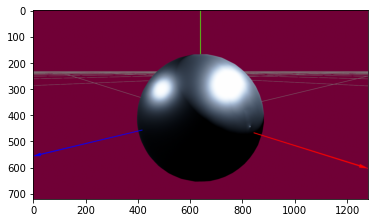

In [ ]:
render.scene.scene.enable_indirect_light(False)
plt.imshow(render.render_to_image()) # looks weird.

### Setting a background

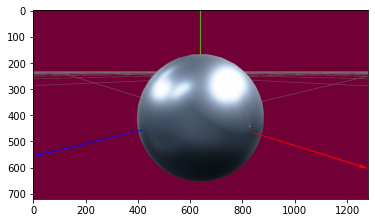

In [ ]:
render.scene.scene.enable_indirect_light(True)
render.scene.set_background(convert_to_float([227, 41, 137, 60]))
render.scene.show_skybox(False) # turning off skybox
img = render.render_to_image()
plt.imshow(img)

Image data can be converted to a numpy array. This means we can do easy operations like comparing images.

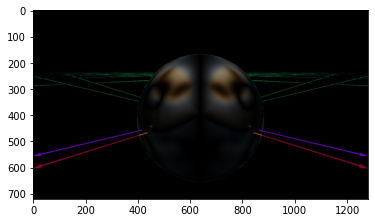

In [ ]:
from PIL import Image, ImageChops

img_flipped = img.flip_horizontal()
plt.imshow(img_flipped)

im1 = Image.fromarray(np.uint8(img))
im2 = Image.fromarray(np.uint8(img_flipped))

diff = ImageChops.difference(im2, im1) # pixel-wise difference

plt.imshow(diff)

What if we want the average pixel-wise difference?

In [ ]:
pixel_diff = np.uint8(img)/255 - np.uint8(img_flipped)/255
pixel_diff = np.float64(pixel_diff)
g_diff = np.mean(pixel_diff, 2) # average over R,G,B
m_norm = np.sum(abs(g_diff))  # Manhattan norm
print(f"Manhattan Diff: {m_norm}")
print(f"Per-Pixel:{m_norm/(1280 * 720)}") # TODO: Make this a function.

Manhattan Diff: 17119.60261437908
Per-Pixel:0.01857595769789397
